In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from pycaret.anomaly import *

In [2]:
data = pd.read_csv("dataset3.csv")
data

,x1,x2,x3
0,12.41,17.95,17.58
1,13.19,17.61,18.01
2,13.44,18.27,17.92
3,11.89,16.71,18.16
4,13.09,18.96,17.96
...,...,...,...
995,12.25,18.35,17.72
996,13.09,18.91,18.97
997,13.38,17.66,17.16
998,12.98,17.69,18.41


In [3]:
dfTrain = data.iloc[:-10]
dfTest = data.iloc[-10:]

In [4]:
anom = setup(data = data, 
             silent = True)

,Description,Value
0,session_id,7023
1,Original Data,"(1000, 3)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1000, 3)"
9,CPU Jobs,-1


In [5]:
anom_model = create_model(model = 'iforest', fraction = 0.2)

In [6]:
results = assign_model(anom_model)

In [7]:
outlierIndexes = np.where(results["Anomaly"] > 0)
outlierIndexes

(array([  3,   5,   7,  12,  17,  18,  28,  30,  53,  57,  60,  65,  76,
         79, 100, 101, 108, 118, 120, 125, 130, 133, 147, 149, 150, 153,
        163, 175, 177, 181, 187, 189, 193, 198, 205, 211, 217, 232, 233,
        234, 240, 263, 268, 269, 271, 273, 278, 281, 283, 287, 293, 294,
        295, 300, 302, 321, 322, 327, 332, 334, 339, 346, 350, 372, 375,
        379, 380, 387, 389, 392, 394, 401, 402, 404, 415, 416, 417, 442,
        455, 464, 468, 472, 476, 478, 481, 483, 485, 489, 491, 492, 495,
        497, 508, 516, 518, 520, 533, 550, 552, 562, 570, 577, 579, 580,
        585, 589, 591, 593, 596, 602, 609, 610, 614, 618, 629, 635, 636,
        638, 646, 649, 650, 651, 652, 659, 662, 669, 671, 684, 687, 691,
        697, 703, 717, 719, 720, 724, 726, 730, 737, 739, 741, 744, 745,
        749, 752, 753, 755, 757, 766, 772, 773, 776, 782, 794, 799, 801,
        802, 803, 808, 809, 810, 812, 815, 817, 818, 829, 830, 837, 844,
        847, 855, 858, 880, 882, 883, 884, 894, 899

<IPython.core.display.Javascript object>


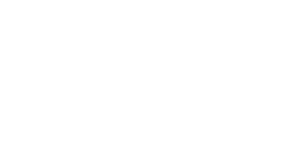

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data["x1"], data["x2"], data["x3"])
ax.scatter(data["x1"].loc[outlierIndexes], data["x2"].loc[outlierIndexes], data["x3"].loc[outlierIndexes], c="orange")

In [1]:
from numpy.linalg import eig, inv

#least squares fit to a 3D-ellipsoid
#  Ax^2 + By^2 + Cz^2 +  Dxy +  Exz +  Fyz +  Gx +  Hy +  Iz  = 1
#
# Note that sometimes it is expressed as a solution to
#  Ax^2 + By^2 + Cz^2 + 2Dxy + 2Exz + 2Fyz + 2Gx + 2Hy + 2Iz  = 1
# where the last six terms have a factor of 2 in them
# This is in anticipation of forming a matrix with the polynomial coefficients.
# Those terms with factors of 2 are all off diagonal elements.  These contribute
# two terms when multiplied out (symmetric) so would need to be divided by two

def ls_ellipsoid(xx,yy,zz):

   # change xx from vector of length N to Nx1 matrix so we can use hstack
   x = xx[:,np.newaxis]
   y = yy[:,np.newaxis]
   z = zz[:,np.newaxis]

   #  Ax^2 + By^2 + Cz^2 +  Dxy +  Exz +  Fyz +  Gx +  Hy +  Iz = 1
   J = np.hstack((x*x,y*y,z*z,x*y,x*z,y*z, x, y, z))
   K = np.ones_like(x) #column of ones

   #np.hstack performs a loop over all samples and creates
   #a row in J for each x,y,z sample:
   # J[ix,0] = x[ix]*x[ix]
   # J[ix,1] = y[ix]*y[ix]
   # etc.

   JT=J.transpose()
   JTJ = np.dot(JT,J)
   InvJTJ=np.linalg.inv(JTJ);
   ABC= np.dot(InvJTJ, np.dot(JT,K))

# Rearrange, move the 1 to the other side
#  Ax^2 + By^2 + Cz^2 +  Dxy +  Exz +  Fyz +  Gx +  Hy +  Iz - 1 = 0
#    or
#  Ax^2 + By^2 + Cz^2 +  Dxy +  Exz +  Fyz +  Gx +  Hy +  Iz + J = 0
#  where J = -1
   eansa=np.append(ABC,-1)

   return (eansa)

   

In [ ]:
x1 = np.num